# <center>EE 6770 Fall 2024: Homework 4</center>

1. __Write comments__ in the code to explain your thoughts.
2. __Important: Execute the codes and show the results__. 
3. __Do your own work.__ 

### Submission:
 * __Submit this notebook file and the pdf version__ - remember to add your name in the filename.
 * Deadline: 11:59 pm, 10/9 (Wednesday)

## Assignment Objectives:

This assignment builds on the work from Homework 3, where you will use Keras to construct and experiment with a neural network as part of the <font color=blue>Machine Learning Workflow</font>. The dataset has been modified to include noisy samples, making the classification task more challenging. The dataset is split into three segments::

* __Train Data: 75% of the dataset__
* __Validation Data: 20% of the Train Data__
* __Test Data: 25% of the dataset__ 

Your task is to improve the provided baseline neural network model and achieve __at least 90% accuracy on the Test Data while preventing overfitting__. You will experiment with various network configurations, including architecture, regularization techniques, and hyperparameter tuning. The key objective is to optimize the model’s performance while maintaining a balance between training and validation accuracy. 

### Steps to accomplish the tasks:

1. __Baseline Model:__
    * This Jupyter Notebook file contains a baseline model with the training, validation, and evaluation procedures already set up.
    * This is your starting point. __The accuracy on the Test Data is ~83%__.

2. __Modify the architecture and training configurations__ to improve performance and prevent overfitting. This is the core of this exericse. You will experiement on combinations of different model architectures and hyperparameters such as:.
    * Network architecture (e.g., number of layers, number of neurons).
    * Regularization techniques (e.g., L1, L2).
    * Optimizers (e.g., Adam, SGD)
    * Learning rates, Epochs
    * Batch size
    * Activation function
    
3. __Track and Document Your Trials__: For each of your trial, document network configurtions and performance metrics:
    * Model architecture (layers/neurons).
    * Regularization and optimizer used.
    * Training loss/accuracy, validation loss/accuracy, and test accuracy.
    * A reflection on whether the model overfitted or improved performance.
    * Present these results in a table format to summarize all your experiments
    * You will present `at least 5 trials` to gain full credit

### Grading Breakdown:
1. **Achieving $\ge$ 90% Test Accuracy (65 points)**: Points will be deducted based on how far the model's performance is from the 90% accuracy target. 
2. **Experimentation and Documentation (30 points)**: Test at least five configurations with clear documentation. This should include modifications to architecture, regularization methods, hyperparameters, and optimizations.
3. **Analysis of Results (5 points)**: Provide clear, well-reasoned explanations for the changes made and analyze how they affected performance. Include observations on underfitting or overfitting where relevant.

### Import Tools

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

### Import Keras and TensorFlow 

In [89]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense
from keras.models import Sequential

## <font color=blue>Section 1: Generate the Spiral Dataset</font>

### <font color=red> Note: Do NOT change the noise level in the function.</font>

In [90]:
def generate_spiral_data(n_points, noise=1.7):
    
    n = np.sqrt(np.random.rand(n_points, 1)) * 720 * (2*np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    
    return np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))), np.hstack((np.zeros(n_points), np.ones(n_points)))

### Generate 1000 pairs of data points.

In [91]:
# Notation:
# X = input data,  Y = labelled target (0 or 1)

X, y = generate_spiral_data(1000)

### Plot the spiral dataset.

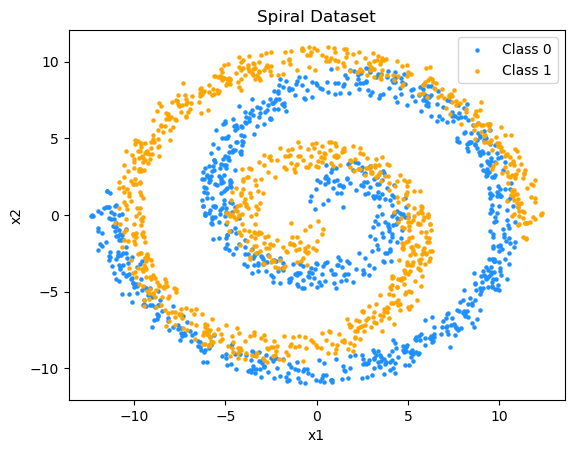

In [92]:
# Plot the dataset with custom colors: Dodger Blue for class 0, Orange for class 1

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='dodgerblue', label='Class 0', s=5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='orange', label='Class 1', s=5)

plt.title('Spiral Dataset')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Normalize the two input features with respect to the mean and standard deviation.
### This is called `z-score normalization`, which helps to accelerate learning. 

In [93]:
def zscore_normalize(X):

    mu = np.mean(X, axis=0)        # find the mean of each column/feature          
                                    
    sigma  = np.std(X, axis=0)     # find the standard deviation of each column/feature            

    X = (X - mu) / sigma           # Normalize each column wrt its mean and std

    return X, mu, sigma

### Write codes to normalize the spiral dataset.

In [94]:
## WRITE YOUR CODE.

X, mu, std = zscore_normalize(X)

## <font color=blue>Section 2: Train-Test Data Split</font>

#### Before building a logistic regression model, let's start by splitting the data into a training set and test set.
#### We will accomplish this by using the `train_test_split` module from `Scikit-Learn`

### Load <font color=blue>Scikit Learn</font> ML packages

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X.shape, y.shape

((2000, 2), (2000,))

In [97]:
# configure the test_size to split the dataset into Train and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [98]:
# Verify the shapes of Train and Test Data

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1500, 2), (500, 2), (1500,), (500,))

## <font color=blue>Section 3: Set Up Neural Network Architecture</font>

### Neural Network Parameters

Here is where you specify the NN architecture of your choice, which shall include:
* Number of hidden layers
* Number of neurons in each of the hidden layer
* Number of neurons in the output layer (please set it as 1)

In [99]:
n = X.shape[1]   # number of input features
m = X.shape[0]   # number of samples

In [100]:
## This is the Baseline Model. You create your own model here.

n1 = 10           # number of neurons in the hidden layer 1
n2 = 10           # number of neurons in the hidden layer 2
n3 = 1           # number of neurons in the output layer 

### <font color=blue> Section 3.1. Define the NN Model </font>

In [101]:
model = Sequential()

model.add(Dense(n1, input_dim=n, activation="tanh"))
model.add(Dense(n2, activation="tanh"))
model.add(Dense(n3, activation="sigmoid"))

#### Top-level summary of the model

In [102]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

#### Check out the weight initialization

In [103]:
W = model.get_weights()

W

[array([[ 0.691387  ,  0.4261667 , -0.55502003,  0.3134808 ,  0.2806732 ,
         -0.07574916,  0.4864276 ,  0.3562445 , -0.12570804,  0.37666076],
        [-0.0174225 , -0.21399793, -0.5060257 , -0.4742992 , -0.6687985 ,
         -0.20965764, -0.50469786, -0.29189658, -0.23630878,  0.2147345 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.11844474, -0.42244005,  0.1705823 , -0.5386892 , -0.17815626,
          0.21986479, -0.4362481 ,  0.18694621,  0.38893896,  0.37706178],
        [ 0.19457328,  0.28566182,  0.16993111, -0.31165075, -0.5180091 ,
          0.02069193,  0.3302418 , -0.10036165, -0.14319754,  0.4304384 ],
        [-0.27653494, -0.13477334,  0.40983957,  0.33464795, -0.42112386,
          0.5227128 ,  0.30469817,  0.10642612,  0.18056208, -0.434113  ],
        [ 0.18859512, -0.01189399, -0.459239  , -0.42224562, -0.19275367,
          0.34221995,  0.4499138 , -0.5270458 , -0.08878392, -0.21334207],
        [-0.01507

### <font color=blue> Section 3.2. Compile the Network Model </font>

#### You need to configure the `compile` API with at least three parameters:

* __<font color='green'>loss</font>__: the loss function of choice. For binary classification, the default = `binary_crossentropy`
* __<font color='green'>optimizer</font>__: the variation of Gradient Descent algorithm. We choose `SGD = Stochastic GD` here
* __<font color='green'>metrics</font>__: the metric to evaluate the training performance
   

In [104]:
sgd = keras.optimizers.SGD(learning_rate=0.2)

model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

## <font color=blue>Section 4: Train and Fit the Model</font>

### Set up hyperparameters

- __<font color='green'> Learning Rate</font>__: It was already set in the previous step when the optimzer is chosen.
- __<font color='green'> Number of Iterations (epochs)</font>__: Vary the number of iterations (epochs) for training. Begin with a moderate number (e.g., 10000) and adjust accordingly. 
- __<font color='green'> Batch Size</font>__: Default value = 32. Play with a few different numbers to see the behavior of the training process.
- __<font color='green'> Steps Per Epoch</font>__: Alternatively, you can set up the number of steps in each epoch and Keras would figure out the batch size automatically
- __<font color='green'> Callbacks</font>__: are powerful features executed at specific stages of the training process (such as at the end of an epoch, batch, or training). They are used to __monitor the training__, perform actions (like __saving the best model__), or __stop training early__ based on certain conditions. We will use the `MakeCheckPoint` option to save the best model with the best validation loss or validation accuracy after training.

For more information on `model.fit`, please refer to the Keras API Documentation.

In [105]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the Early Stopping callback. For a choppy SGD optimizer, this may not work as expected.
early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True, verbose=0)

# Create the ModelCheckpoint callback. The best model is saved in H5 format.
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose = 0)

In [106]:
history = model.fit(X, y, epochs=10000, steps_per_epoch=None, batch_size = 256, validation_split=0.25, verbose = 0,
                callbacks=[checkpoint])

### Display the history on `Loss` and `Accuracy` for both the Train Data and Validation Data

In [107]:
# Retrieve training results

train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

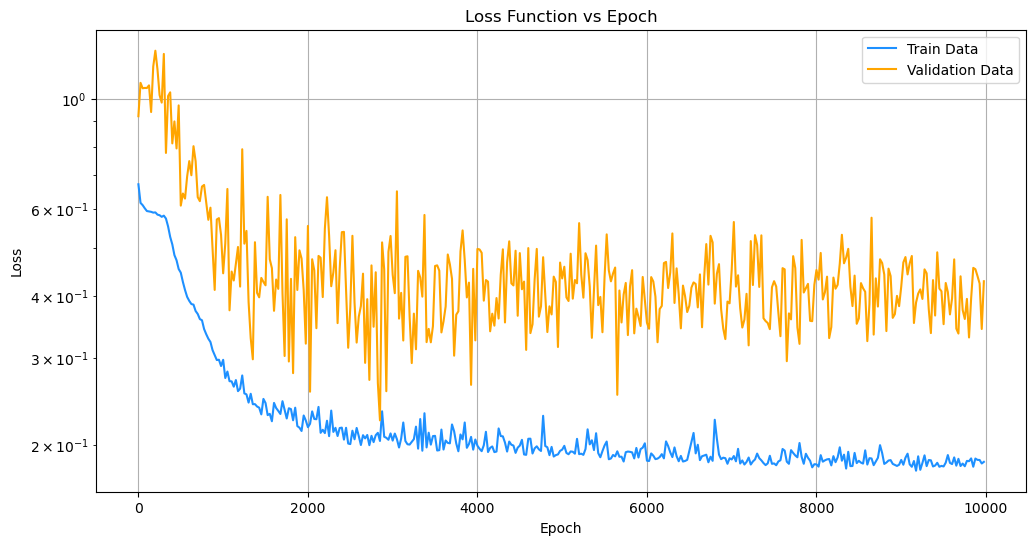

In [108]:
plt.figure(figsize=(12,6))

# Adjust the value of 'step' to plot the results every 'step' epoch.
# This allows you to have cleaner plot when the number of epochs are large

step = 25
x_range = range(0, len(train_loss), step)
plt.plot(x_range, train_loss[ : :step], color='DodgerBlue', label='Train Data')
plt.plot(x_range, valid_loss[ : :step], color='orange', label='Validation Data')

plt.title('Loss Function vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

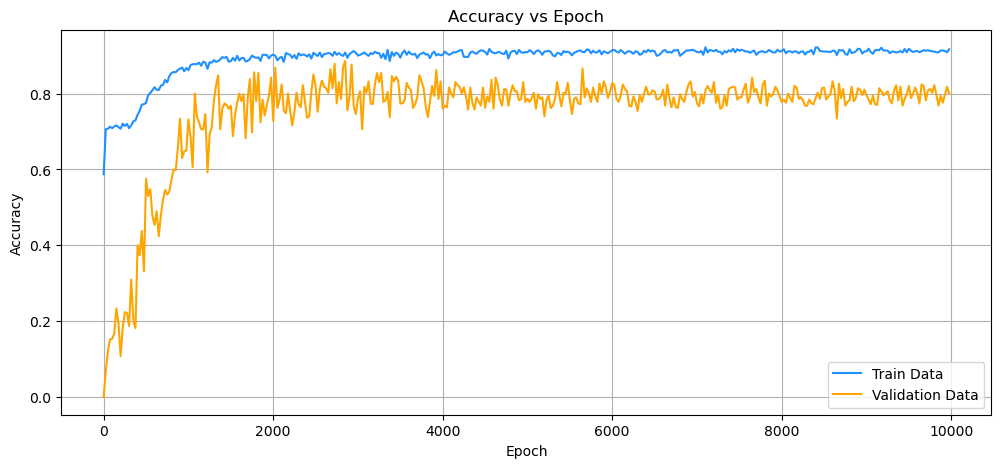

In [109]:
plt.figure(figsize=(12,5))

# Adjust the value of 'step' to plot the results every 'step' epoch.
# This allows you to have cleaner plot when the number of epochs are large

step = 25
x_range = range(0, len(train_acc), step)
plt.plot(x_range, train_acc[ : :step], color='DodgerBlue', label='Train Data')
plt.plot(x_range, valid_acc[ : :step], color='orange', label='Validation Data')

plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Print the following outputs after model training:
* #### Final loss function for the Train Data and Validation Data.
* #### Final accuracy performance for the Train Data and Validation Data.

In [110]:
print (f"The final loss for the Train Data = {train_loss[-1] :.4f}")

print (f"The final loss for the Validation Data = {valid_loss[-1] :.4f}")

The final loss for the Train Data = 0.1823
The final loss for the Validation Data = 0.4532


In [111]:
print (f"The accuracy for the Train Data = {train_acc[-1]*100 :.2f}%")

print (f"The accuracy for the Validation Data = {valid_acc[-1]*100 :.2f}%")

The accuracy for the Train Data = 91.40%
The accuracy for the Validation Data = 78.20%


## <font color=blue>Section 5: Model Evaluation</font>

### <font color=blue>Section 5.1. Performance Analysis</font>

We use the `evaluate` method to obtain the `loss` and `accuracy` performance of the `Test Data` using the best training model. 

### Load the model with the best `val_loss`

In [112]:
from keras.models import load_model

# Load the best model
best_model = load_model('best_model.keras')

### Use the loaded model to evaluate or make predictions

In [113]:
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=1)

print(f"Test Data Loss: {loss: .4f}")
print(f"Test Data Accuracy: {accuracy*100: .2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.8851 - loss: 0.2486
Test Data Loss:  0.2323
Test Data Accuracy:  90.40%


### <font color=blue>Section 5.2. Visualize the Decision Boundary
We will use the `predict()` method to revise the codes for plotting the decision bounday in Homework 3. 

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a meshgrid of points
def create_meshgrid(X, h=0.01):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Predict function that computes output for each point in the meshgrid
def predict_on_grid(xx, yy, model):
    
    grid = np.c_[xx.ravel(), yy.ravel()]  # Combine the grid points into a shape for input
    
    # Use the trained model to predict the class for each point in the grid
    
    predictions = model.predict(grid)
    class_predictions = (predictions >= 0.5).astype(int)     # Convert sigmoid output to binary class (0 or 1)
    
    return class_predictions.reshape(xx.shape)

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    
    xx, yy = create_meshgrid(X)
    Z = predict_on_grid(xx, yy, model)

    plt.figure(figsize=(8, 8))
    # Plot the contour map for decision boundary
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
    
    # Plot the original data points
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='dodgerblue', label='Class 0', s=5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='orange', label='Class 1', s=5)
    plt.legend()
    plt.title('Decision Boundary Visualization')
    plt.show()


7259/7259 ━━━━━━━━━━━━━━━━━━━━ 4s 495us/step


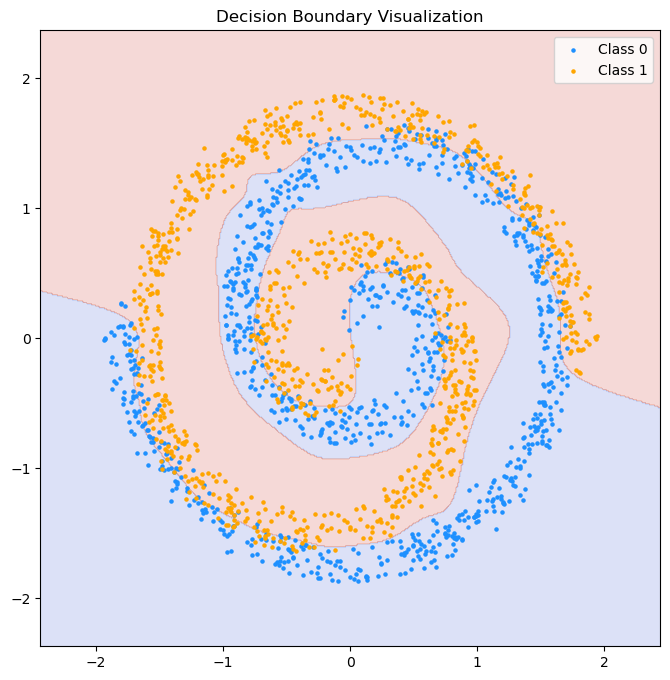

In [115]:
# Example usage after training your neural network

plot_decision_boundary(X, y, best_model)

7259/7259 ━━━━━━━━━━━━━━━━━━━━ 4s 499us/step


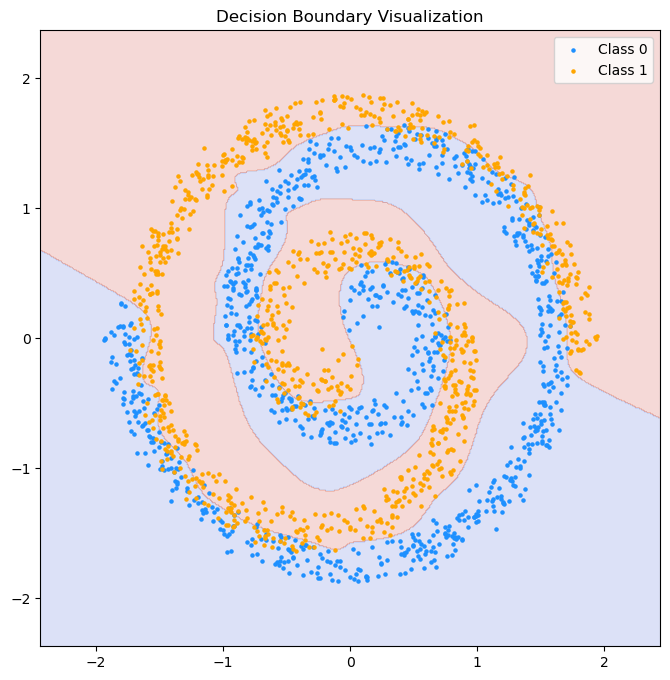

In [116]:
# For comparison: Use the model at the end of training

plot_decision_boundary(X, y, model)